# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [24]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import requests
import time

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
request = requests.get(url, headers = headers)

# If no information is extracted, then connect as anonymous
if request:
    time.sleep(10)
    soup = BeautifulSoup(request.text,"html")
    soup




In [27]:
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [28]:
#Look for Index tables
for index, table in enumerate(tables):
    index_table = index
    if index_table == 1:
        break
    
index


1

In [55]:
import pandas as pd
df_tesla_revenue = pd.DataFrame(columns= [
    "date", 
    "values"
])

for row in tables[index_table].tbody.find_all("tr"):
    col= row.find_all("td")
    if (col != []):
        date = col[0].text
        Revenue = col[1].text.replace("$","").replace(",","").strip()
        if(Revenue != ""):
         df_tesla_revenue = pd.concat([df_tesla_revenue,pd.DataFrame({"date":date, "values": float(Revenue)}, index=[0])], ignore_index= True)

/tmp/ipykernel_12841/2751015498.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tesla_revenue = pd.concat([df_tesla_revenue,pd.DataFrame({"date":date, "values": float(Revenue)}, index=[0])], ignore_index= True)


In [56]:
df_tesla_revenue

,date,values
0,2024-09-30,25182.0
1,2024-06-30,25500.0
2,2024-03-31,21301.0
3,2023-12-31,25167.0
4,2023-09-30,23350.0
...,...,...
56,2010-09-30,31.0
57,2010-06-30,28.0
58,2010-03-31,21.0
59,2009-09-30,46.0


In [57]:
df_tesla_revenue.tail()

,date,values
56,2010-09-30,31.0
57,2010-06-30,28.0
58,2010-03-31,21.0
59,2009-09-30,46.0
60,2009-06-30,27.0


In [58]:
import sqlite3

connection = sqlite3.connect("TeslaquarteRevenue.db")
connection

In [59]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE TeslaQuarterRevenue (Date, Revenue)""")

In [60]:
tesla_data = list(df_tesla_revenue.to_records(index = False))
tesla_data[:5]

[np.record(('2024-09-30', 25182.0), dtype=[('date', 'O'), ('values', '<f8')]),
 np.record(('2024-06-30', 25500.0), dtype=[('date', 'O'), ('values', '<f8')]),
 np.record(('2024-03-31', 21301.0), dtype=[('date', 'O'), ('values', '<f8')]),
 np.record(('2023-12-31', 25167.0), dtype=[('date', 'O'), ('values', '<f8')]),
 np.record(('2023-09-30', 23350.0), dtype=[('date', 'O'), ('values', '<f8')])]

In [61]:
cursor.executemany("INSERT INTO TeslaQuarterRevenue VALUES (?,?)", tesla_data)
connection.commit()

In [62]:
for row in cursor.execute("SELECT * FROM TeslaQuarterRevenue ORDER BY date ASC",
                           ):
    print(row)

('2009-06-30', 27.0)
('2009-09-30', 46.0)
('2010-03-31', 21.0)
('2010-06-30', 28.0)
('2010-09-30', 31.0)
('2010-12-31', 36.0)
('2011-03-31', 49.0)
('2011-06-30', 58.0)
('2011-09-30', 58.0)
('2011-12-31', 39.0)
('2012-03-31', 30.0)
('2012-06-30', 27.0)
('2012-09-30', 50.0)
('2012-12-31', 306.0)
('2013-03-31', 562.0)
('2013-06-30', 405.0)
('2013-09-30', 431.0)
('2013-12-31', 615.0)
('2014-03-31', 621.0)
('2014-06-30', 769.0)
('2014-09-30', 852.0)
('2014-12-31', 957.0)
('2015-03-31', 940.0)
('2015-06-30', 955.0)
('2015-09-30', 937.0)
('2015-12-31', 1214.0)
('2016-03-31', 1147.0)
('2016-06-30', 1270.0)
('2016-09-30', 2298.0)
('2016-12-31', 2285.0)
('2017-03-31', 2696.0)
('2017-06-30', 2790.0)
('2017-09-30', 2985.0)
('2017-12-31', 3288.0)
('2018-03-31', 3409.0)
('2018-06-30', 4002.0)
('2018-09-30', 6824.0)
('2018-12-31', 7226.0)
('2019-03-31', 4541.0)
('2019-06-30', 6350.0)
('2019-09-30', 6303.0)
('2019-12-31', 7384.0)
('2020-03-31', 5985.0)
('2020-06-30', 6036.0)
('2020-09-30', 8771.0)
('2

Revenue Trend Over Time

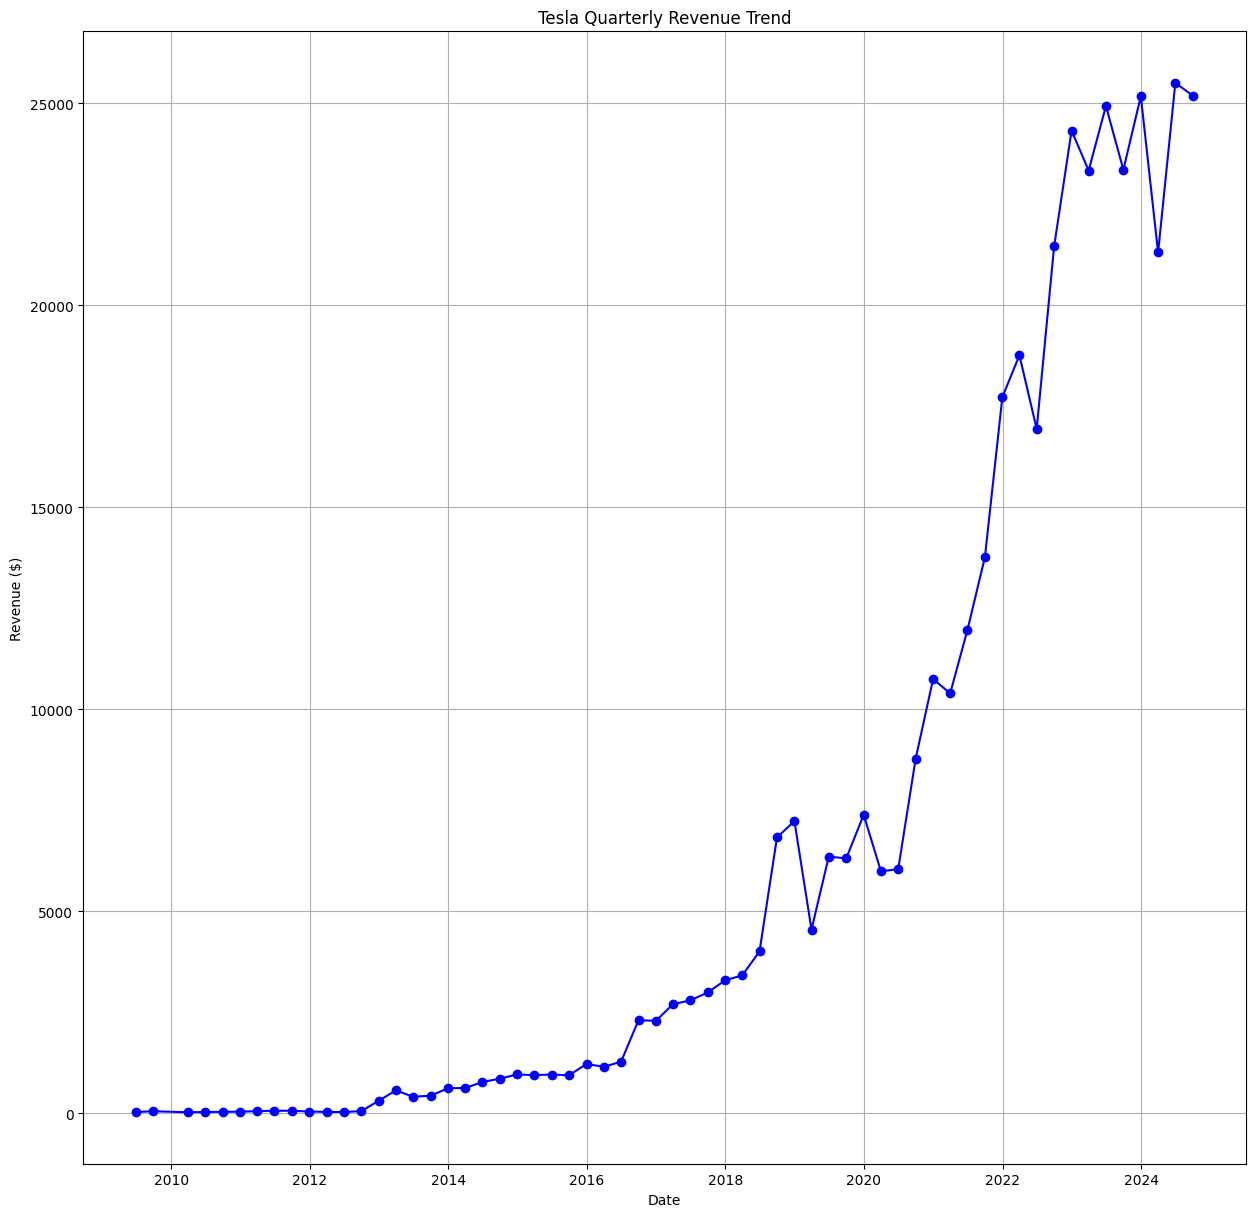

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df_tesla_revenue['date'] = pd.to_datetime(df_tesla_revenue['date'])
df_tesla_revenue.sort_values('date', inplace=True)

plt.figure(figsize=(15, 50))


plt.subplot(3, 1, 1)  
plt.plot(df_tesla_revenue['date'], df_tesla_revenue['values'], marker='o', linestyle='-', color='b')
plt.title('Tesla Quarterly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)

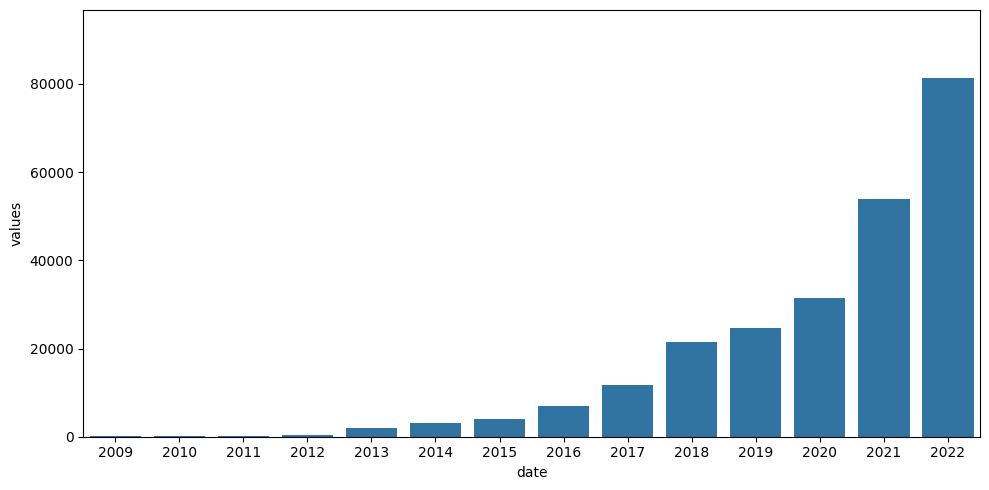

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tesla_revenue["date"] = pd.to_datetime(df_tesla_revenue["date"])


tesla_revenue_yearly = (
    df_tesla_revenue.groupby(df_tesla_revenue["date"].dt.year)["values"].sum().reset_index()
)

fig, axis = plt.subplots(figsize=(10, 5))
sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["date"] < 2023], x="date", y="values", orient = 'v',ax=axis)

min_value = 0
max_value = tesla_revenue_yearly["values"].max()
axis.set_ylim(min_value, max_value)

plt.tight_layout()
plt.show()

In [39]:
df_tesla_revenue["date"]

61   2009-06-30
60   2009-09-30
59   2009-12-31
58   2010-03-31
57   2010-06-30
        ...    
4    2023-09-30
3    2023-12-31
2    2024-03-31
1    2024-06-30
0    2024-09-30
Name: date, Length: 62, dtype: datetime64[ns]

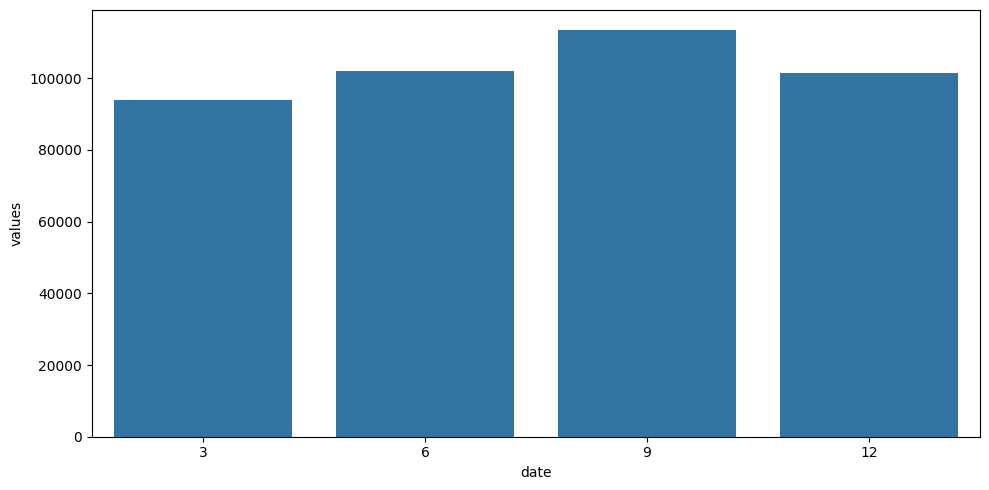

In [66]:
fig, axis = plt.subplots(figsize = (10, 5))


tesla_revenue_monthly = df_tesla_revenue.groupby(df_tesla_revenue["date"].dt.month)["values"].sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "date", y = "values")

plt.tight_layout()

plt.show()